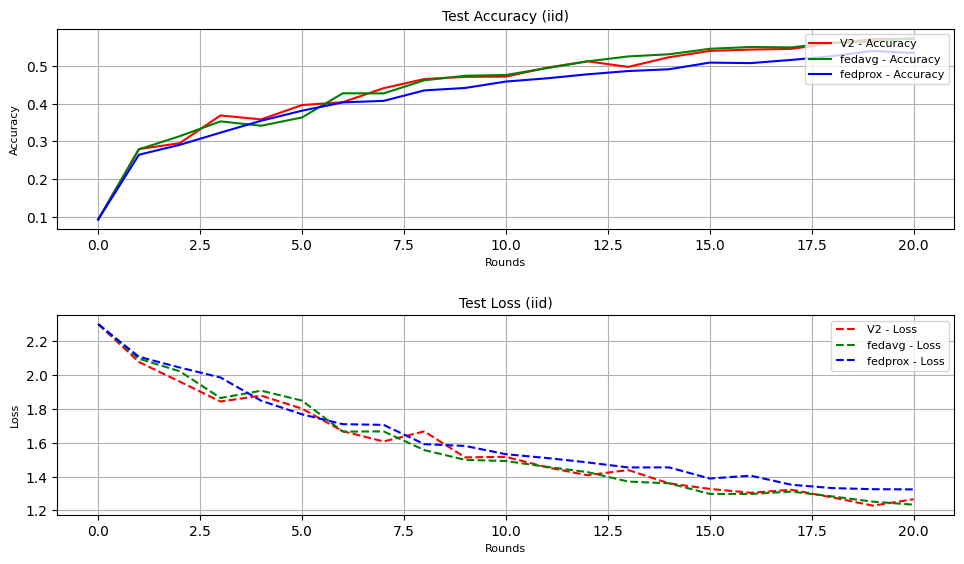

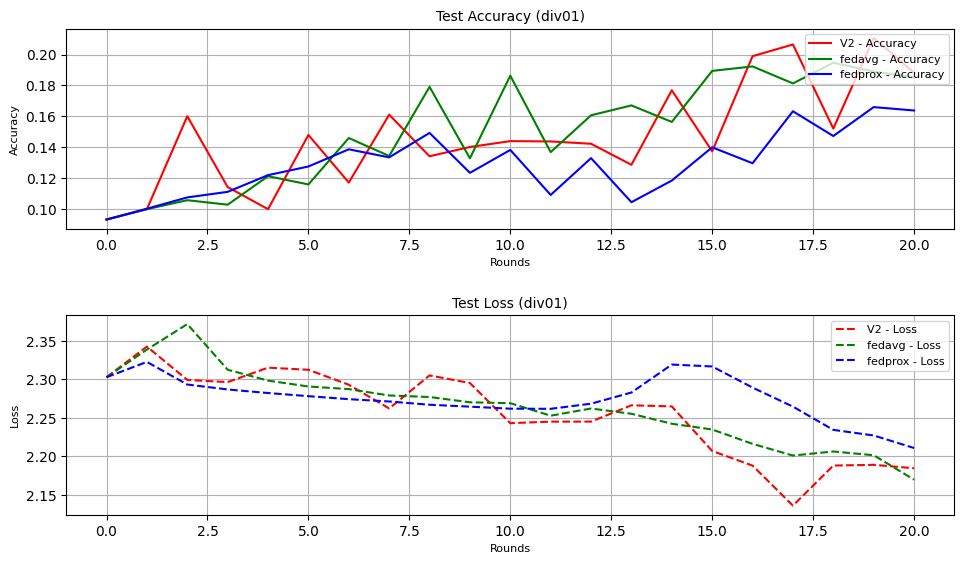

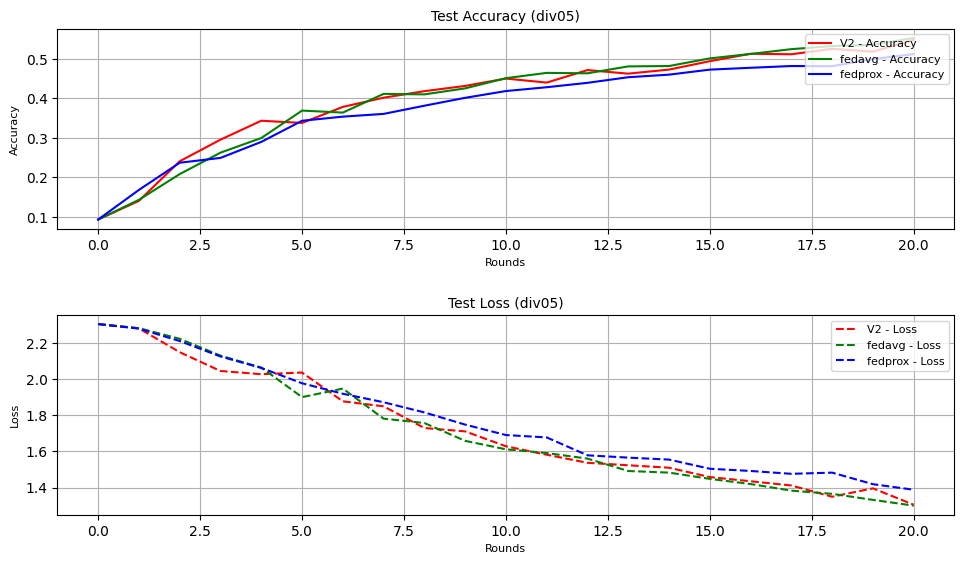

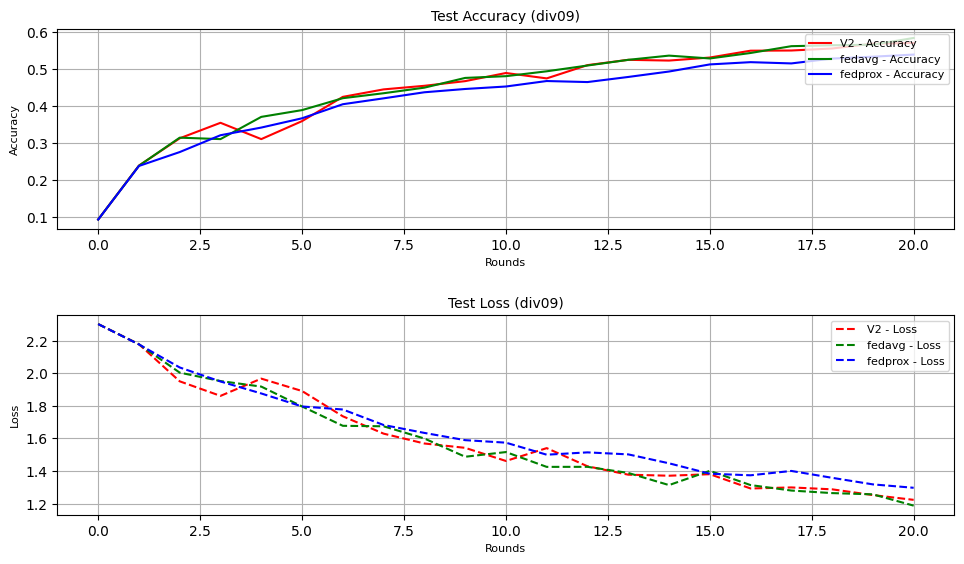

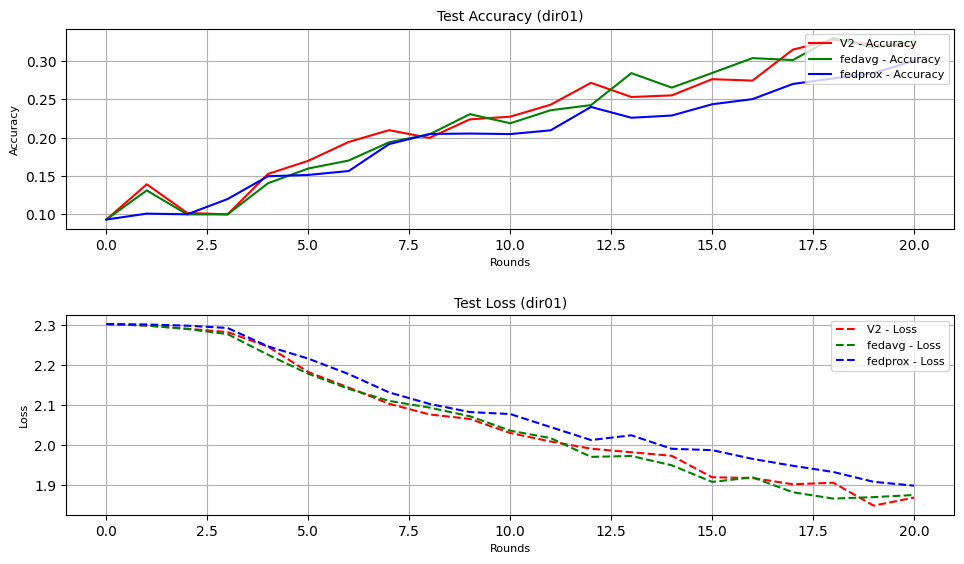

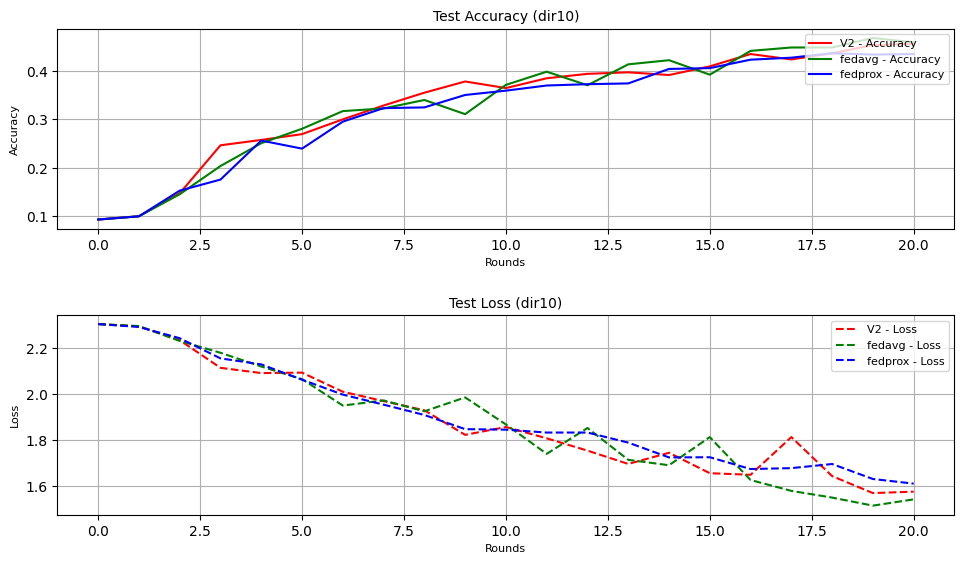

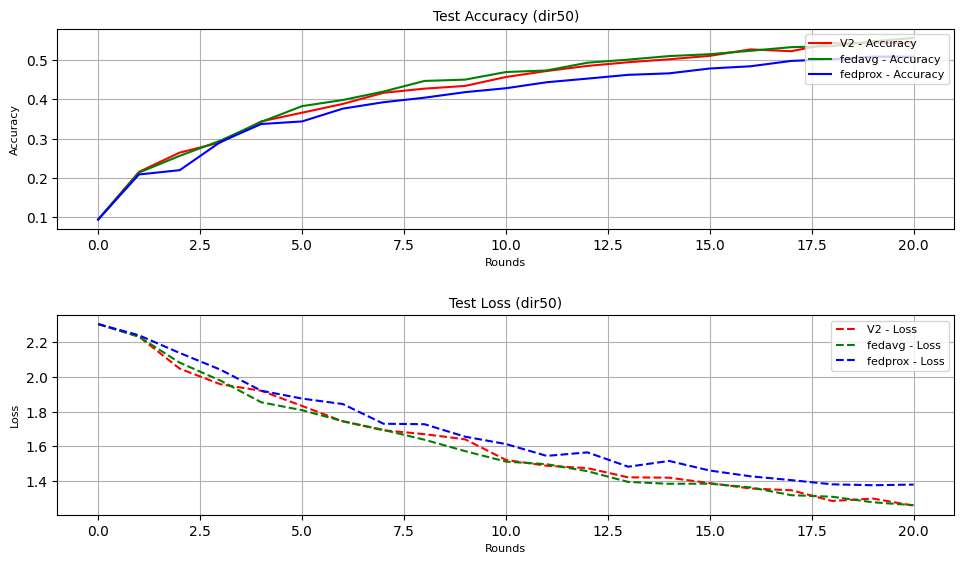

In [2]:
import flgo.experiment.analyzer as fea
import matplotlib.pyplot as plt
%matplotlib inline

# 设置更好看的默认样式
plt.rcParams['figure.figsize'] = (12, 8)  # 调整图像尺寸
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.axisbelow'] = True

# 定义任务路径和划分方式
task_prefix = '/home/mgr/sss/easyFL-FLGo/c-program/tasks/9.21'

partitions = [
    'iid',
    'div01',
    'div05',
    'div09',
    'dir01',
    'dir10',
    'dir50'
]
algor_list = [
    # 'V1', 
    'V2',
    'fedavg', 
    'fedprox'
    ]

# 创建一个字典来存储所有记录
all_records = {}

for partition in partitions:
    task_path = f"{task_prefix}/{partition}"
    records = fea.load_records(task_path, algor_list)
    all_records[partition] = records

def plot_performance(records, partition):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))  # 调整子图尺寸
    colors = ['r', 'g', 'b']
    labels = algor_list
    
    for i, record in enumerate(records):
        rounds = record.log['communication_round']
        accuracy = record.log['test_accuracy']
        loss = record.log['test_loss']
        
        # Plot accuracy
        ax1.plot(rounds, accuracy, color=colors[i], label=f'{labels[i]} - Accuracy')
        
        # Plot loss
        ax2.plot(rounds, loss, color=colors[i], linestyle='--', label=f'{labels[i]} - Loss')
    
    ax1.set_title(f'Test Accuracy ({partition})', fontsize=10)  # 减小标题字体大小
    ax1.set_xlabel('Rounds', fontsize=8)  # 减小轴标签字体大小
    ax1.set_ylabel('Accuracy', fontsize=8)
    ax1.legend(fontsize=8, loc='upper right')  # 调整图例位置和字体大小
    
    ax2.set_title(f'Test Loss ({partition})', fontsize=10)
    ax2.set_xlabel('Rounds', fontsize=8)
    ax2.set_ylabel('Loss', fontsize=8)
    ax2.legend(fontsize=8, loc='upper right')
    
    plt.tight_layout(pad=2.0)  # 调整子图之间的间距
    plt.show()

# 为每个划分方式绘制图表
for partition, records in all_records.items():
    plot_performance(records, partition)